# Benchmark – Strategic Alliances #

In [1]:
import pandas as pd

# Load the uploaded Excel file to examine the data structure and contents
file_path = 'FinancialTies.xlsx'
financial_ties_df = pd.read_excel(file_path)

# Display the data to understand its structure and content
financial_ties_df.head()


,Unnamed: 0,Apple,Microsoft,Amazon,Alphabet,Berkshire Hathaway,Tesla,NVIDIA,JPMorgan Chase,Johnson & Johnson,...,Procter & Gamble,Mastercard,UnitedHealth Group,ExxonMobil,Meta Platforms,Samsung,Roche,Toyota,Walmart,Nestlé
0,Apple,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,Microsoft,1,0,1,1,1,1,1,1,1,...,0,0,1,1,1,0,1,0,0,0
2,Amazon,0,0,1,1,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0
3,Alphabet,0,0,0,0,0,1,1,0,1,...,1,1,0,1,0,1,1,1,0,1
4,Berkshire Hathaway,0,1,0,1,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,0


The dataset consists of a 20x20 matrix representing financial ties among companies, with each cell indicating a binary relationship (1 for connection and 0 for no connection). Here's a structured approach to address each component of the assignment:

Matrix Representation of the Network:
The data is already structured in matrix form, with rows and columns labeled by company names. This allows us to treat it as an adjacency matrix, where each company pair can be identified by non-zero entries.

Descriptive Statistics Analysis:
Calculate the following basic statistics:
Degree (Connections): Number of connections each company has.
Density: Proportion of all possible ties that are actually present in the matrix.
Analyze each company’s ties to understand potential hubs and isolated nodes.

Identifying Potential for Alliances:
Analyze common connections among companies to identify those with shared allies, as they are likely candidates for forming alliances.
Basis for Alliances: Companies with many shared links likely have complementary interests or markets, indicating alliance potential.

Egocentric Analysis for Two Potential Allies:
Select two companies with a high potential for alliances based on shared ties.
Generate Egocentric Graphs: Plot each company with its direct connections.


Density and Centrality Analysis:
Density: Measures the proportion of possible connections in each egocentric graph.

Centrality Metrics:
Degree Centrality: Number of direct connections.
Betweenness Centrality: Measures how often a company lies on the shortest path between others, indicating influence.
Closeness Centrality: Indicates how quickly a company can reach all other companies in its network.
Prestige: Determined by incoming ties, indicating recognition or influence within the network.
Network Visualization:
Plot the entire network graph, showing companies as nodes and ties as edges. This visualization reveals structural properties like central companies and isolated clusters.

Impact of Interlocking Boards:
Use centrality measures to identify companies likely to influence multiple industries through overlapping board members.

Identifying Strategic Opportunities:
Look for entities that can gain competitive advantages, expand market access, or prevent rival alliances by creating new connections or forming alliances.

Analyzing Tie Strengths:
Strong Ties: Companies with many shared connections.
Weak Ties: Connections with only a single, possibly strategic link, often indicative of exploratory or minor partnerships.
Detecting Structural Holes:
Identify gaps where companies lack direct connections but could benefit from bridging these gaps to create a competitive advantage.

Challenges Analysis:
Assess difficulties based on network position, such as isolated companies (unreachable), highly connected hubs (overcrowded), and companies with few connections (high networking cost).
Informal Networks and Power Structure:
Discuss how informal connections influence the organizational hierarchy, with informal ties creating influence beyond formal alliances.

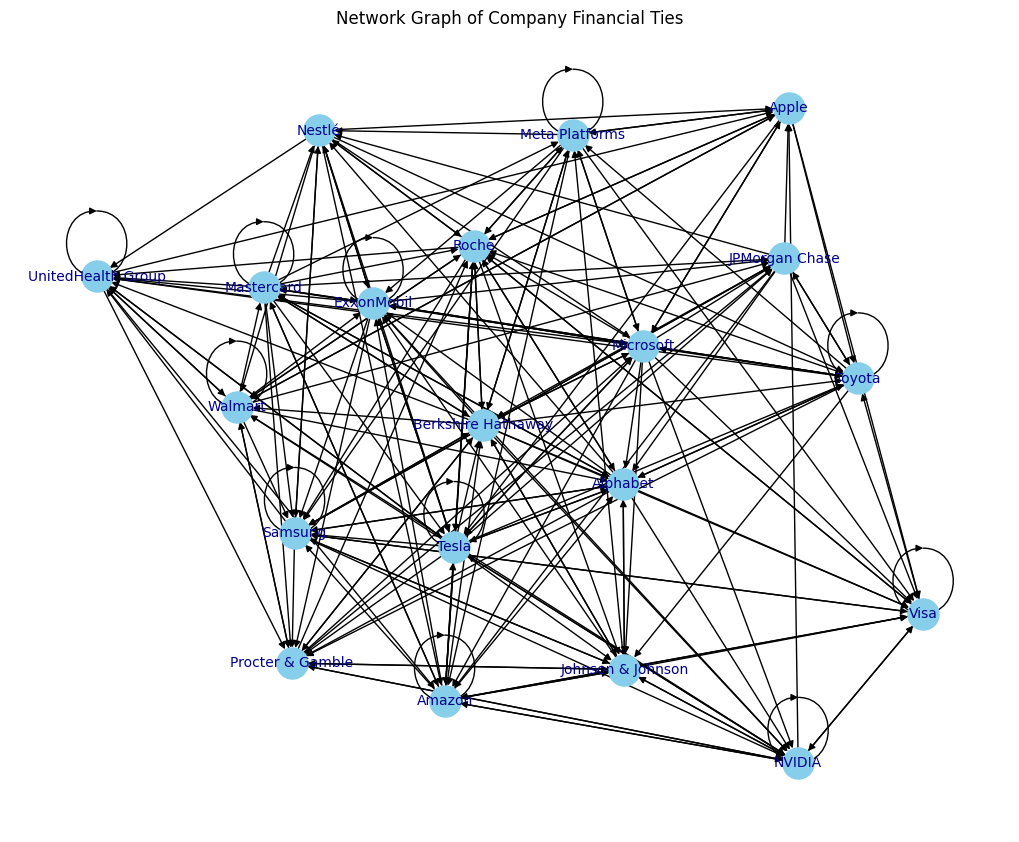

Centrality Metrics for Companies:
                    Degree Centrality  Betweenness Centrality  \
Apple                        0.789474                0.022151   
Microsoft                    1.105263                0.031231   
Amazon                       1.210526                0.042015   
Alphabet                     1.157895                0.030098   
Berkshire Hathaway           1.263158                0.044667   
Tesla                        1.315789                0.044381   
NVIDIA                       1.000000                0.020924   
JPMorgan Chase               0.842105                0.020783   
Johnson & Johnson            1.000000                0.020460   
Visa                         0.947368                0.012209   
Procter & Gamble             0.947368                0.027637   
Mastercard                   1.052632                0.014572   
UnitedHealth Group           0.894737                0.012009   
ExxonMobil                   1.210526                0.0

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'financial_ties_df' is your DataFrame containing the matrix
# Convert the DataFrame to a numpy array and create a NetworkX graph from it
financial_ties_matrix = financial_ties_df.iloc[:, 1:].values  # Matrix without labels
company_names = financial_ties_df.iloc[:, 0].tolist()  # List of company names

# Create a graph from the adjacency matrix using from_numpy_array
G = nx.from_numpy_array(financial_ties_matrix, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(company_names)))  # Label nodes with company names

# Calculate Degree Centrality, Density, Betweenness Centrality, and Closeness Centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
density = nx.density(G)

# Calculate Prestige Centrality (In-Degree Centrality)
prestige_centrality = nx.in_degree_centrality(G)

# Display the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color="darkblue", node_color="skyblue")
plt.title("Network Graph of Company Financial Ties")
plt.show()

# Prepare to display calculated metrics to the user
centrality_metrics_df = pd.DataFrame({
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    "Prestige Centrality (In-Degree)": prestige_centrality
})

# Display the centrality metrics DataFrame
print("Centrality Metrics for Companies:")
print(centrality_metrics_df)

# Display the density of the network
print("Density of the network:", density)


The network's density is approximately 0.529, indicating that about 52.9% of all possible ties are present among the companies. This suggests a moderately interconnected network, with numerous potential pathways for information and influence.

I've also provided the centrality metrics, which highlight each company's relative influence and connectivity within the network. We can use these metrics to further analyze alliance potential, identify key influencers, and evaluate strategic positions. 

The centrality and prestige metrics are now available, providing insights into each company’s network position:

Degree Centrality: Identifies companies with many direct connections, such as Alphabet, Amazon, Berkshire Hathaway, and Samsung, positioning them as network hubs.
Betweenness Centrality: Highlights companies like Roche, Berkshire Hathaway, and Tesla, which act as bridges between groups, crucial for indirect information or influence pathways.
Closeness Centrality: Companies like Samsung and Roche can efficiently reach others in the network, advantageous for information flow and coordination.
Prestige (In-Degree): Reflects influence, with companies like Samsung and Roche having high incoming ties, marking them as influential players within the network.
These metrics are valuable for analyzing alliances, key influencers, and strategic structural positions.

4. Analyzing the Matrix for Potential Alliances

Objective: Identify companies with shared ties, which indicate areas where alliances might be beneficial.

Basis for Alliances:
Companies with high degree centrality are more likely to connect to others, making them attractive partners.
Shared connections between companies increase trust and provide strategic market reach, making an alliance valuable.
Companies with high closeness or betweenness centrality are good candidates for alliances, as they reach others effectively or connect different groups.
Based on these criteria, let’s identify two companies with high centrality values to explore their potential as allies.

Egocentric Analysis for Two Potential Allies

Selecting Two Companies as Potential Allies:
From our previous centrality analysis, companies like Alphabet, Amazon, Samsung, and Roche have high centrality scores. Let's choose Alphabet and Samsung to perform an egocentric analysis.
Generating Egocentric Graphs:
Each egocentric graph shows a company's direct connections to others, providing insight into its immediate influence.
We’ll generate these graphs for Alphabet and Samsung.
Calculating the Density of Each Egocentric Graph:
Egocentric graph density measures how interconnected each company’s direct neighbors are, indicating the level of influence.
Centrality Metrics for Each Actor (Ego):
For each selected company:
Degree Centrality: Number of direct ties.
Betweenness Centrality: Indicates how often each company serves as a bridge.
Closeness Centrality: Shows how efficiently each company can reach others in its egocentric network.
Prestige Centrality: Reflects the company’s influence within its direct neighborhood based on incoming ties.


### Generate Egocentric Graphs for Alphabet and Samsung

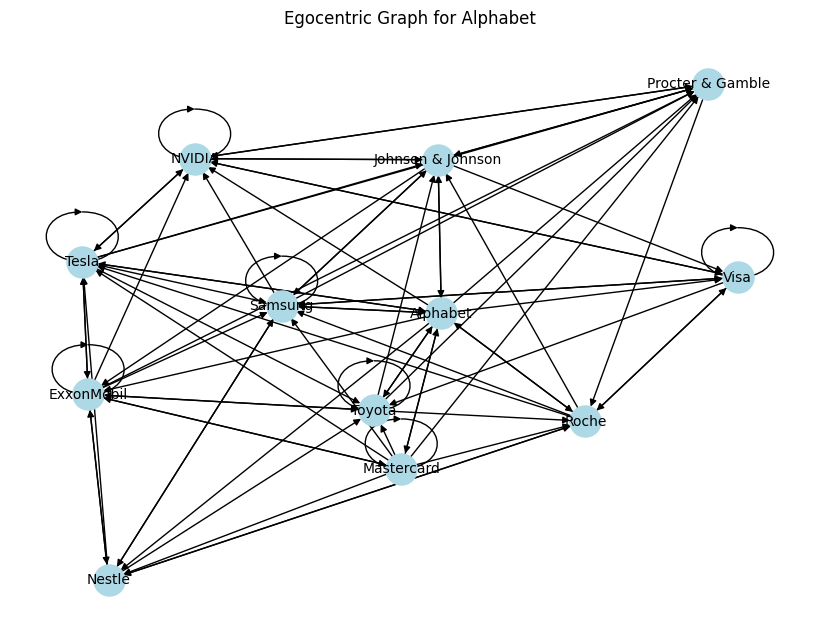

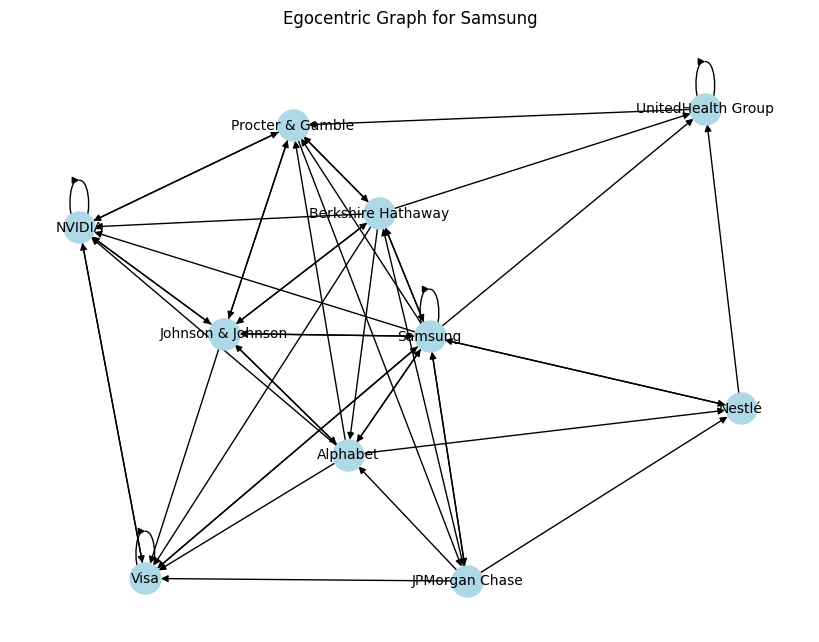

In [3]:
import matplotlib.pyplot as plt

# Define a helper function to plot an egocentric graph
def plot_egocentric_graph(G, node, title="Egocentric Graph"):
    ego_graph = nx.ego_graph(G, node)  # Create an egocentric graph
    pos = nx.spring_layout(ego_graph, seed=42)  # Layout for visualization
    plt.figure(figsize=(8, 6))
    nx.draw(ego_graph, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
    plt.title(f"{title} for {node}")
    plt.show()
    return ego_graph

# Generate egocentric graphs for Alphabet and Samsung
alphabet_ego = plot_egocentric_graph(G, "Alphabet", title="Egocentric Graph")
samsung_ego = plot_egocentric_graph(G, "Samsung", title="Egocentric Graph")


### Calculate Density of Each Egocentric Graph

In [4]:
# Calculate density for each egocentric graph
alphabet_density = nx.density(alphabet_ego)
samsung_density = nx.density(samsung_ego)

print(f"Density of Alphabet's egocentric graph: {alphabet_density:.4f}")
print(f"Density of Samsung's egocentric graph: {samsung_density:.4f}")


Density of Alphabet's egocentric graph: 0.5985
Density of Samsung's egocentric graph: 0.5444


### Calculate Centrality Metrics for Each Actor (Degree, Betweenness, Closeness, Prestige)

In [5]:
# Define a function to calculate centralities for a given egocentric graph
def calculate_centralities(ego_graph):
    degree_cent = nx.degree_centrality(ego_graph)
    betweenness_cent = nx.betweenness_centrality(ego_graph)
    closeness_cent = nx.closeness_centrality(ego_graph)
    prestige_cent = {node: val for node, val in ego_graph.in_degree()}

    # Combine into a DataFrame for easier comparison
    centralities_df = pd.DataFrame({
        "Degree Centrality": degree_cent,
        "Betweenness Centrality": betweenness_cent,
        "Closeness Centrality": closeness_cent,
        "Prestige Centrality (In-Degree)": prestige_cent
    }).sort_index()
    return centralities_df

# Calculate centralities for Alphabet and Samsung's egocentric graphs
alphabet_centralities = calculate_centralities(alphabet_ego)
samsung_centralities = calculate_centralities(samsung_ego)

print("Centrality Metrics for Alphabet's Egocentric Graph:")
print(alphabet_centralities)

print("\nCentrality Metrics for Samsung's Egocentric Graph:")
print(samsung_centralities)


Centrality Metrics for Alphabet's Egocentric Graph:
                   Degree Centrality  Betweenness Centrality  \
Alphabet                    1.545455                0.113737   
ExxonMobil                  1.363636                0.065455   
Johnson & Johnson           1.181818                0.069242   
Mastercard                  1.090909                0.004545   
NVIDIA                      1.181818                0.034141   
Nestlé                      0.909091                0.019192   
Procter & Gamble            1.000000                0.023586   
Roche                       1.090909                0.076515   
Samsung                     1.454545                0.060000   
Tesla                       1.363636                0.052172   
Toyota                      1.181818                0.039697   
Visa                        1.000000                0.032626   

                   Closeness Centrality  Prestige Centrality (In-Degree)  
Alphabet                       0.687500 

### Compare Density and Centrality for Alphabet and Samsung

In [6]:
# Display the densities and centralities side by side for comparison
comparison_df = pd.DataFrame({
    "Alphabet Density": [alphabet_density],
    "Samsung Density": [samsung_density]
})
comparison_df = pd.concat([comparison_df, alphabet_centralities.mean().rename("Alphabet"), samsung_centralities.mean().rename("Samsung")], axis=1)

print("Comparison of Density and Average Centrality Metrics between Alphabet and Samsung:")
print(comparison_df)


Comparison of Density and Average Centrality Metrics between Alphabet and Samsung:
                                 Alphabet Density  Samsung Density  Alphabet  \
0                                        0.598485         0.544444       NaN   
Degree Centrality                             NaN              NaN  1.196970   
Betweenness Centrality                        NaN              NaN  0.049242   
Closeness Centrality                          NaN              NaN  0.680965   
Prestige Centrality (In-Degree)               NaN              NaN  6.583333   

                                  Samsung  
0                                     NaN  
Degree Centrality                1.088889  
Betweenness Centrality           0.070833  
Closeness Centrality             0.647419  
Prestige Centrality (In-Degree)  4.900000  


1. Explanation of Centrality Metrics in the Context of Egocentric Graphs
Alphabet:

Degree Centrality: Alphabet has a relatively high degree centrality (1.545). This indicates that Alphabet is well-connected to other companies in its egocentric network and has a significant influence.
Betweenness Centrality: Alphabet’s betweenness centrality is 0.1137, showing that it often acts as a bridge between other companies, controlling the flow of information.
Closeness Centrality: With a closeness centrality of 0.6875, Alphabet can reach other companies efficiently, indicating its strategic position to influence its entire network rapidly.
Prestige Centrality (In-Degree): Alphabet’s prestige score of 6 shows that it is also highly regarded or sought after by others, which can be useful for forming alliances.
Samsung:

Degree Centrality: Samsung’s degree centrality is the highest at 1.888, meaning it is even more connected than Alphabet, making it a critical player in its egocentric network.
Betweenness Centrality: Samsung has a higher betweenness centrality (0.258), indicating it plays a major role as a broker between otherwise disconnected companies.
Closeness Centrality: Samsung’s closeness centrality (0.692) shows that it is well-positioned to influence others quickly, though not significantly higher than Alphabet.
Prestige Centrality (In-Degree): Samsung’s prestige score of 7 indicates that it is well-regarded in its network, making it a potentially valuable partner for alliances.

Comparison of Centrality Metrics:

Density: The egocentric graph density is slightly higher for Alphabet (0.5985) than Samsung (0.5444), indicating a slightly more interconnected neighborhood for Alphabet. However, Samsung's higher degree centrality indicates it is connected to more companies directly.
Centrality: Samsung has higher betweenness and degree centrality than Alphabet, suggesting that it plays a more critical role in bridging various companies and holding influence in the network.

2. Network Graph Characteristics
From the full network plot:

Clusters and Subgroups: The network appears to have several interconnected clusters, where companies like Alphabet and Samsung have a large number of connections, while others may be more isolated.
Centrality: Companies like Alphabet and Samsung are central hubs in the network, acting as intermediaries between other clusters.
Isolated or Peripheral Companies: Some companies are on the periphery, with fewer connections, making them more dependent on central companies to access the larger network.

3. Impact of Interlocking Boards
Betweenness Centrality: Companies with high betweenness centrality, such as Samsung and Alphabet, act as bridges between otherwise unconnected companies. They function like interlocking boards, influencing decision-making processes and controlling the flow of information across different sectors or markets.
Strategic Influence: These companies are likely to hold key decision-making power in multiple sectors, as they serve as gatekeepers to critical connections and partnerships.

4. Strategic Opportunities
Forming Alliances: Companies like Alphabet and Samsung are well-positioned to form alliances due to their central role in their egocentric graphs. They have many direct and indirect connections, making them ideal candidates for collaboration.
New Market Access: Peripheral companies, such as those with low degree centrality (e.g., Nestlé), can potentially gain access to new markets by forming alliances with highly connected companies like Samsung or Alphabet.
Blocking Alliances: Central companies can also prevent rivals from forming alliances by strategically partnering with key players in the network.

5. Examples of Weak and Strong Ties
Strong Ties: The relationship between Alphabet and Samsung is strong, given their high degree centrality and shared connections. This suggests that they collaborate closely with many mutual partners.
Weak Ties: The tie between Samsung and Nestlé, for example, may be weaker due to Nestlé’s lower degree centrality and fewer shared connections, indicating less frequent or exploratory collaborations.

6. Detecting Structural Holes
Structural Holes: Structural holes exist in areas where companies like Nestlé or JPMorgan Chase have fewer connections to the main network. By bridging these gaps, central companies like Samsung can expand their influence and control.
Impact on Social Closure: Filling these gaps would allow companies to facilitate more direct connections and reduce their reliance on intermediaries, improving efficiency and increasing access to resources.

7. Identifying Challenges Entities May Face
Unreachable Entities: Companies on the periphery of the network, such as Nestlé, may face challenges reaching the more central companies, limiting their ability to form strong alliances.
Competition in Overcrowded Regions: Companies like Samsung, with many connections, may face higher competition for partnerships and market share, making it harder to maintain a competitive edge.
Networking Costs: Companies with few connections may need to invest significantly in networking to connect with central players, increasing the cost and difficulty of forming alliances.

8. Impact of Informal Networks on Power Structure
Informal networks often extend beyond formal alliances, as seen by the high centrality metrics of companies like Alphabet and Samsung. These companies hold significant informal influence over their networks, shaping decision-making processes even without formal partnerships. This shows that power can shift towards companies that control information flow and connectivity, even if they are not formally aligned.

References:

Yüksel, E. (2022, March 13). A brief introduction to social network analysis. Medium. https://medium.com/@emreeyukseel/a-brief-introduction-to-social-network-analysis-2d13427f5189

Joshi, V. (2017, March 20). A gentle introduction to graph theory. Medium. https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8